#Data Preparation


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/attrition' ,index_col=0)

In [ ]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,Life Sciences,2,0,94,3,...,6,4,0,5,False,True,False,True,False,True
1,49,0,279,8,1,Life Sciences,3,1,61,2,...,10,7,1,7,True,False,True,False,True,False
2,37,1,1373,2,2,Other,4,1,92,2,...,0,0,0,0,False,True,True,False,False,True
3,33,0,1392,3,4,Life Sciences,4,0,56,3,...,8,7,3,0,True,False,True,False,True,False
4,27,0,591,2,1,Medical,1,1,40,3,...,2,2,2,2,False,True,True,False,True,False


In [ ]:
target = df['Attrition'].copy()
df = df.drop(["Attrition"], axis = 1)
type(target)

pandas.core.series.Series

In [ ]:
target.value_counts()

,count
Attrition,
0,1233
1,237


In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 33)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 33)
Number transactions y_test dataset:  (368,)


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols = ['EducationField', 'JobRole'])
X_train = ce_target.fit_transform(X_train, y_train)
X_test = ce_target.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 924, 1: 924})


In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233869,1,0,99,3,2,...,5,4,0,1,False,True,False,True,False,True
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,2,2,2,False,True,True,False,False,True
2,43,422,1,3,0.151584,4,0,33,3,2,...,5,2,2,2,True,False,True,False,True,False
3,42,188,29,3,0.127479,2,1,56,1,2,...,1,0,0,0,False,True,True,False,False,True
4,35,992,1,3,0.127479,4,1,68,2,1,...,3,0,1,2,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,34,906,13,3,0.167218,3,0,50,3,1,...,14,11,12,12,False,True,True,False,False,True
1844,25,193,22,1,0.182128,3,1,55,1,1,...,2,0,0,1,False,True,True,False,True,True
1845,41,328,4,2,0.141393,2,1,59,1,2,...,7,7,7,5,False,True,False,True,True,True
1846,42,1003,21,3,0.183327,2,0,84,3,2,...,3,3,1,2,True,True,False,True,False,True


#Bagging


##Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_sm, y_sm, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")


K-Fold Accuracy Mean: 
 Train: 87.40 
 Validation: 82.04


###Hyper Parameter Tuning

####Grid Search CV

In [ ]:

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X_sm, y_sm)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 400}
Best score:  0.9123376623376623


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X_sm, y_sm , cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")


K-Fold Accuracy Mean: 
 Train: 99.796 
 Validation: 91.674


####Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
random.fit(X_sm, y_sm)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 300, 'max_features': 10, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Best score:  0.9101731601731601


###Feature Importance

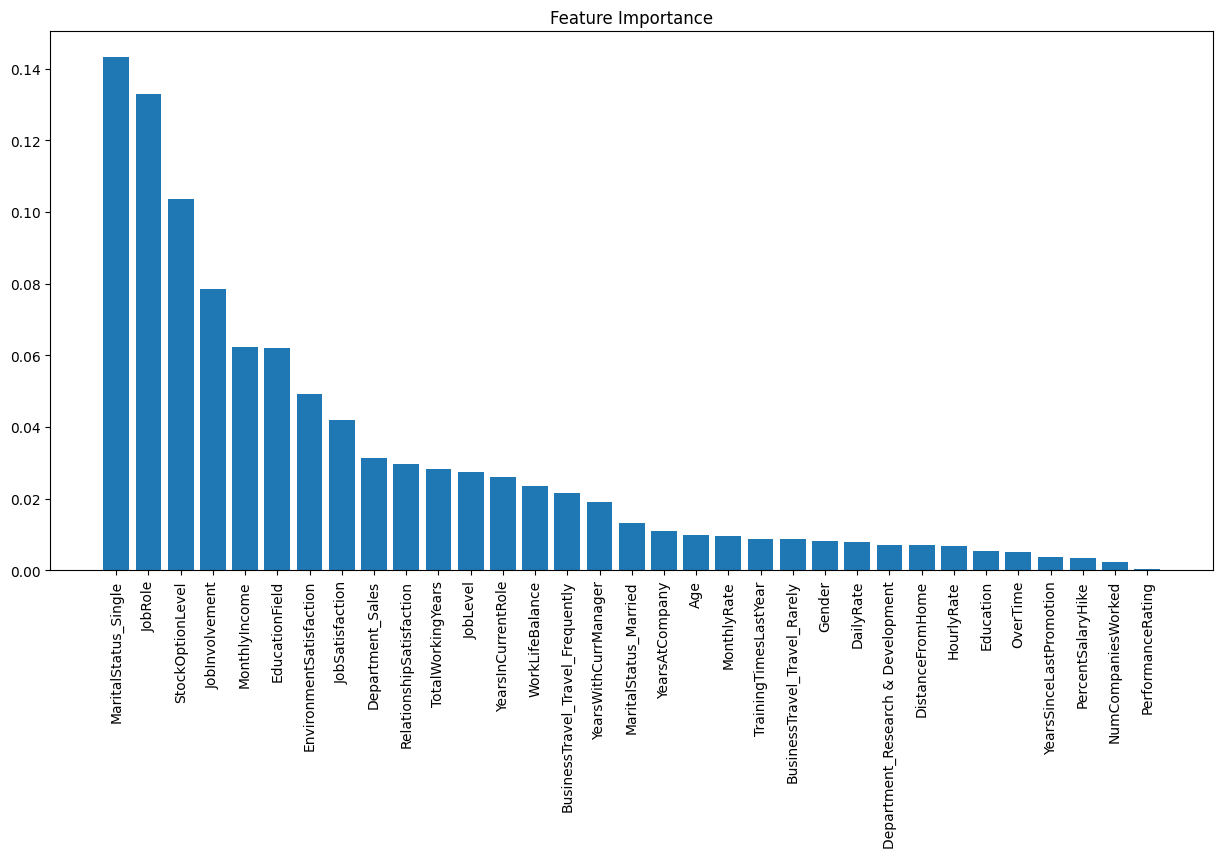

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt

rf_clf.fit(X_sm, y_sm)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

#Boosting

##GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [ ]:
gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(X_train, y_train)

0.9165154264972777

In [ ]:
gbc.score(X_test, y_test)

0.8804347826086957

In [ ]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['friedman_mse', 'squared_error'],
          'loss' :['log_loss' ,'exponential']
         }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X_sm, y_sm)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 5, 'n_estimators': 200}
Best score:  0.9036796536796537


####After Tuning


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, max_depth=5, criterion = 'friedman_mse' ,loss = 'log_loss')

In [ ]:
gbc.fit(X_sm, y_sm)

GradientBoostingClassifier(max_depth=5, n_estimators=300)

In [ ]:
gbc.score(X_train, y_train)

1.0

In [ ]:
gbc.score(X_test, y_test)

0.8668478260869565

#Other Ensemble Techniques

##XG Boost

In [ ]:
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(return_X_y=True, as_frame=True)


In [ ]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,Cover_Type
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


In [ ]:
X.shape

(581012, 54)

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time


X, y = fetch_covtype(return_X_y=True, as_frame=True)

X = X.iloc[:100000]
y = y.iloc[:100000]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


start_time = time.time()
gbm.fit(X_train, y_train)
end_time = time.time()


y_pred = gbm.predict(X_test)

# 6. Evaluate performance
accuracy = accuracy_score(y_test, y_pred)

print(" Training Time: {:.2f} seconds".format(end_time - start_time))



 Training Time: 182.13 seconds


In [ ]:
from sklearn.datasets import fetch_covtype
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time


X, y = fetch_covtype(return_X_y=True, as_frame=True)


y = y - 1

X = X.iloc[:100000]
y = y.iloc[:100000]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


start_time = time.time()
xgb.fit(X_train, y_train)
end_time = time.time()


y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(" Training Time: {:.2f} seconds".format(end_time - start_time))
print("Accuracy:", accuracy)

 Training Time: 9.06 seconds
Accuracy: 0.84865


##Light GBM

In [ ]:
from sklearn.datasets import fetch_covtype
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time


X, y = fetch_covtype(return_X_y=True, as_frame=True)

# Adjust target variable to be zero-indexed
y = y - 1

# X = X.iloc[:100000]
# y = y.iloc[:100000]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


lgbm  = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
     verbosity = -1
)


start_time = time.time()
lgbm.fit(X_train, y_train)
end_time = time.time()


y_pred = lgbm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(" Training Time: {:.2f} seconds".format(end_time - start_time))
print("Accuracy:", accuracy)

 Training Time: 22.06 seconds
Accuracy: 0.7616928994948495


##Stacking

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



X, y = fetch_covtype(return_X_y=True, as_frame=True)


X, y = X[:10000], y[:10000]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', C=1.0))
]


meta_model = LogisticRegression(max_iter=1000)


stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


stacking_clf.fit(X_train, y_train)


y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.8590
